### 魔术命令

#### 定义及使用
可以看作运行于IPython系统中的命令行程序，为常用任务提供了便利以及轻松控制IPython系统的行为。大多数都有一些命令行选项，使用`?`可以查看`%reset`命令，如下

In [1]:
?%reset

#### %run命令
使用该命令可以将所有文件当做Python程序来运行，假如新建一文件untitled.py，如下

In [ ]:
def f(x,y,z):
    return x+y+z
a=1
b=2
c=3
result = f(a,b,c)

只要将该文件使用`%run`运行，此后，该文件中所定义所有变量（还有各种import、函数和全局变量）就可以在当前IPython中访问，如下图

In [2]:
%run untitled.py

In [3]:
c

3

In [4]:
result

6

如果希望脚本使用IPython命名空间中定义的变量，那就应该使用`%run -i`

#### %automagic
魔术命令一般以百分号`%`为前缀，也可以不使用`%`，只要定义没有与其同名的变量即可，这个技术叫做*automagic*，可以通过`%automagic`打开或关闭

#### %quickref或%magic
访问魔术命令文档

#### %timeit
检测Python语句的执行时间，如下

In [5]:
import numpy as np
data = np.random.randn(100,100)
%timeit np.dot(data,data)

206 µs ± 20.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### %reset
删除interactive命名空间中的全部变量/名称，用法如图：

In [6]:
a=1

In [7]:
a

1

In [8]:
%reset -f

In [9]:
a

NameError: name 'a' is not defined

#### %hist
用于打印命令的输入（输出）历史，可以通过`-f`保存历史记录到文件中，`-n`用于输出选项后指定的某行历史记录

#### %xdel variable
删除variable，并尝试清除其在IPyhton中的对象上的一切引用

#### %load file.py
Jupyter notebook中，可以将脚本文件中的代码块导入到一个代码单元，如下图：

In [11]:
# %load untitled.py
def f(x,y,z):
    return x+y+z
a=1
b=2
c=3
result = f(a,b,c)

### 与matplotlib很好的集成
标准Pyhton shell，当创建绘图窗口时，GUI的事件会循环接管Python会话的控制权，直到绘图窗口关闭，无法实现交互式的数据分析和可视化。而Ipython很好地集成了matplotlib。如下：

In [13]:
import matplotlib.pyplot as plt

In [15]:
img = plt.imread('Ipython_3.png')

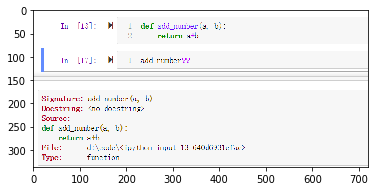

In [16]:
plt.imshow(img)

### 输入和输出变量
忘记将函数结果赋值给变量，可以通过`_``__`来找回上一个变量和上上一个变量，如下

In [17]:
2*23

46

In [18]:
4*23

92

In [19]:
__

46

In [20]:
4*23

92

In [21]:
_

92

输入的文本将被保存在`_iX`，其中X为输入行的行号，每个输入变量都有一个对应的输出变量`_X`,如下

In [22]:
foo = 'bar'

In [23]:
foo

'bar'

In [24]:
_i23

'foo'

In [25]:
_23

'bar'

### 输入输出历史有关的魔术函数
+ `%hist`显示全部或者部分输入历史记录；
+ `%reset`清空interactive命名空间，并可选择是否清空输入输出缓存
+ `%xdel`用于清除Ipython系统中特定对象的一切引用
在处理非常大的数据集的时候，一定要注意IPython的输入输出历史，它会导致所有对象引用都无法被垃圾收集器处理（即释放内存），即使用`del`关键字将变量从interactive命名空间中删除也不行。对于这种情况，谨慎地使用`%xdel`和`%reset`将有助于避免出现内存方面的问题

### 记录输入和输出
IPython能够记录整个控制台会话，执行`%logstart`即可开始记录日志，与之相关的魔术命令`%logoff`、`%logon`、`%logstate`、`%logstop`。

### 与操作系统交互
IPython另一个重要特点就是它和操作系统shell结合非常紧密，可以直接在IPython中使用系统的命令行活动，此外还提供了**shell命令别名**以及**目录书签**等功能.

### shell命令和别名
在IPython中，以感叹号`!`开头的命令行表示其后的所有内容需要在系统shell中执行，甚至还可以启动一个Python解释器（并不是所有的命令行都可以在Jupyter notebook中使用，比如：`!python`就不可以，另外`!cd ..`也无法使用，只有使用`%cd ..`）
可以将shell命令的控制台输出存放的IPython的变量中，它返回的是一个自定义列表，如下

In [26]:
a = !ipconfig

In [27]:
a[13]

'   IPv4 地址 . . . . . . . . . . . . : 192.168.200.9'

同时，在使用`!`时，IPython还允许使用当前环境中定义的Python值，只需要在变量名前面加上`$`符号，如下图

In [28]:
foo = 'in*'

In [29]:
!dir $foo

 驱动器 D 中的卷没有标签。
 卷的序列号是 1C36-D23C

 D:\Code 的目录

2019/03/25  00:14    <DIR>          input
               0 个文件              0 字节
               1 个目录  6,377,779,200 可用字节


`%alias`可以为shell命令自定义简称，同时可以一次执行多条命令，只需将它们写在一行上并以**分号**隔开(多条命令在Jupyter notebook中不支持)，如下

In [30]:
%alias ll dir

In [31]:
ll

 驱动器 D 中的卷没有标签。
 卷的序列号是 1C36-D23C

 D:\Code 的目录

2019/05/10  16:30    <DIR>          .
2019/05/10  16:30    <DIR>          ..
2019/05/10  14:42    <DIR>          .ipynb_checkpoints
2019/05/09  00:08               617 array.txt
2019/05/08  00:02               530 array_archive.npz
2019/03/25  00:14    <DIR>          input
2019/01/13  15:41            13,631 Ipython_3.png
2019/05/10  13:14             1,769 IPython基础.ipynb
2019/01/15  23:27             2,031 NYC Taxi Preci.ipynb
2019/05/07  23:59               168 some_array.npy
2019/05/10  16:30            26,655 Untitled.ipynb
2019/05/10  14:44                60 untitled.py
2019/01/20  20:27    <DIR>          __pycache__
2019/05/10  01:25             4,123 伪随机数生成.ipynb
2019/05/10  13:25             2,754 内省.ipynb
2019/05/10  13:27               807 异常和跟踪（相对于Python的优势）.ipynb
2019/05/10  01:24            23,227 随机漫步.ipynb
              12 个文件         76,372 字节
               5 个目录  6,377,779,200 可用字节


In [41]:
%alias test (cd ..; cd Code)

In [42]:
test

系统找不到指定的路径。


### 软件开发工具
IPython紧密集成并加强了Python内置的`pdb`调试器，同时还提供了一些简单易用的代码运行时间及性能分析工具。

#### 交互式调试器
IPython的调试器增强了pdb的一些功能：Tab键自动完成、语法高亮、为异常跟踪的每条信息添加上下文参考

#### 事后调试器
在发生异常后，立即执行`%debug`调取‘事后’调试器，可以直接跳转到发生异常的那个栈桢，同时可以通过`u`(或up)和`d`（或down）在各级别的栈跟踪之间切换，如下

In [43]:
run untitled.py

ZeroDivisionError: division by zero

In [44]:
%debug

> d:\code\untitled.py(3)<module>()
      1 a=1
      2 b=0
----> 3 c=a/b

ipdb> u
> c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipython\utils\py3compat.py(188)execfile()
    186     with open(fname, 'rb') as f:
    187         compiler = compiler or compile
--> 188         exec(compiler(f.read(), fname, 'exec'), glob, loc)
    189 
    190 # Refactor print statements in doctests.

ipdb> d
> d:\code\untitled.py(3)<module>()
      1 a=1
      2 b=0
----> 3 c=a/b

ipdb> d
*** Newest frame
ipdb> u
> c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipython\utils\py3compat.py(188)execfile()
    186     with open(fname, 'rb') as f:
    187         compiler = compiler or compile
--> 188         exec(compiler(f.read(), fname, 'exec'), glob, loc)
    189 
    190 # Refactor print statements in doctests.

ipdb> exit


在这个调试器，可以运行Python代码并查看各个栈帧中的一切对象和数据。
执行`%pdb on`命令可以将调试器设置为自动开启状态，这样在发生异常的时候可以自动打开。

#### 断点调试
`%run d`进行断点调试，输入`s`（或step）进行单步调试，然后利用`b N`（其中N表示行号）设置断点，再输入`c`(或continue)运行到断点位置，这时可以输入`n`（或next）直接执行到下一行，整个过程可以使用`!`加变量名查看该变量，如下图：

In [45]:
%run -d untitled.py

Breakpoint 1 at d:\code\untitled.py:1
NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> d:\code\untitled.py(1)<module>()
1---> 1 a=1
      2 b=0
      3 c=a/b

ipdb> b 3
Breakpoint 2 at d:\code\untitled.py:3
ipdb> c
> d:\code\untitled.py(3)<module>()
1     1 a=1
      2 b=0
2---> 3 c=a/b

ipdb> !a
1
ipdb> exit


`h`（或help）可以查看调试器的命令,并且`h`加上相应命令，可以得到命令详情，如下

In [46]:
%run -d untitled.py

Breakpoint 1 at d:\code\untitled.py:1
NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> d:\code\untitled.py(1)<module>()
1---> 1 a=1
      2 b=0
      3 c=a/b

ipdb> h

Documented commands (type help <topic>):
EOF    cl         disable  interact  next    psource  rv         unt   
a      clear      display  j         p       q        s          until 
alias  commands   down     jump      pdef    quit     source     up    
args   condition  enable   l         pdoc    r        step       w     
b      cont       exit     list      pfile   restart  tbreak     whatis
break  continue   h        ll        pinfo   return   u          where 
bt     d          help     longlist  pinfo2  retval   unalias  
c      debug      ignore   n         pp      run      undisplay

Miscellaneous help topics:
exec  pdb

ipdb> exit


#### 测试代码的执行时间
`%time`和`%timeit`两个命令都是用来测试一条语句的执行时间，不同的是，`%time`一次测试只执行一遍语句，而`%timeit`是对同一语句执行多遍以产生一个平均执行时间，如下

In [47]:
strings = ['foo','foobar','baz','python'] * 100000

In [48]:
%time method1 = [x for x in strings if x.startswith('foo')]

Wall time: 172 ms


In [50]:
%time method2 = [x for x in strings if x[:3]=='foo']

Wall time: 109 ms


In [51]:
%timeit method1 = [x for x in strings if x.startswith('foo')]

127 ms ± 8.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [52]:
%timeit method2 = [x for x in strings if x[:3]=='foo']

73.5 ms ± 4.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 基本性能分析
代码的性能主要关注的是程序中耗费时间的位置，目前Python性能分析工具是**cProfile**模块，该模块在执行一个程序或代码块时，会记录各个函数耗费的时间。
**启动方式**：通过命令行`python -m cProfile file.py`来执行file.py脚本，执行结果会按照函数名排序，如果加入`pyhton -m cProfile -s cumulative file.py`会按照耗费时间排序。
>注：cProfile模块记录的是各函数从起始到调用结束的时间，不会因为中间调用其他函数而重新计时。

IPython为cProfile提供了接口，通过命令`%prun`或者`%run -p`,通过`%prun`命令启动的工具分析的是Python语句而不是整个.py文件,如下

In [53]:
def add(a, b):
    return a + b

In [54]:
%prun -s cumulative add(1,2)

In [ ]:
         4 function calls in 0.000 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 <ipython-input-53-17cbf0e59835>:1(add)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

执行`%run -p -s cumulative file.py`也可以达到上述效果，如下

In [57]:
%run -l 7 -p -s cumulative untitled.py

### 逐行分析函数性能
一般利用`%prun`（cProfile）做‘宏观的’性能分析，它得到结果要么不足以说明函数的执行时间，要么复杂难懂。因此，可以利用一种名说`line_profiler`的小型库来对一个或多个函数进行逐行性能分析,

#### `line_profiler`如何通过编程的方式使用？
在编程时需要加入修饰符`@profile`，如下


```python
@profile
def foo():
    task = []

    for a in range(0, 101):
        for b in range(0, 101):
            if a + b == 100:
                task.append((a, b))
    return task


@profile
def run():
    for item in foo():
        pass


if __name__ == '__main__':
    run()
```

运行下面命令
>kernprof -l -v loopdemo.py

其中，-l表示逐行分析,-v用于输出。同时会输出一个文件:juliademo.py.lprof，后期可以对.lprof文件进行分析。

#### IPython中怎么使用`line_profiler`?
在IPython中的**启动方式**：`%lprun`，想要使用魔术命令`%lprun`有两个引入方法：
1. 修改IPython配置
2. 先导入模块`%load_ext line_profiler`

#### `%prun`和`%lprun`的对比
`%lprun`需要指明测试的哪个或哪些函数，通用的语法为：

```python
%lprun -f func1 -f func2 statement_to_profile
```

使用`%prun`和`%lprun`两种命令运行相同函数的效果对比如下：

In [59]:
import numpy as np
def add_and_sum (x, y):
    added = x + y
    sumed = added.sum(axis = 1)
    return sumed
def call_function():
    x = np.random.randn(1000,1000)
    y = np.random.randn(1000,1000)
    return add_and_sum(x, y)

In [60]:
x = np.random.randn(3000, 3000)
y = np.random.randn(3000, 3000)
%prun add_and_sum(x, y)

In [ ]:
         7 function calls in 0.125 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.092    0.092    0.117    0.117 <ipython-input-59-7130ce313ee4>:2(add_and_sum)
        1    0.025    0.025    0.025    0.025 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.008    0.008    0.125    0.125 <string>:1(<module>)
        1    0.000    0.000    0.125    0.125 {built-in method builtins.exec}
        1    0.000    0.000    0.025    0.025 {method 'sum' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.025    0.025 _methods.py:34(_sum)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [61]:
%load_ext line_profiler

In [62]:
%lprun -f add_and_sum add_and_sum(x,y)

In [ ]:
Timer unit: 6.98413e-08 s

Total time: 0.114491 s
File: <ipython-input-59-7130ce313ee4>
Function: add_and_sum at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     2                                           def add_and_sum (x, y):
     3         1    1232416.0 1232416.0     75.2      added = x + y
     4         1     406817.0 406817.0     24.8      sumed = added.sum(axis = 1)
     5         1         76.0     76.0      0.0      return sumed

可以看出使用`%prun`得到的结果不能说明什么问题，而`%lprun`的命令结果就容易理解很多了，同时`%lprun`命令可以对多个函数一起测试，效果如下：

In [63]:
%lprun -f add_and_sum -f call_function call_function()

In [ ]:
Timer unit: 6.98413e-08 s

Total time: 0.00949478 s
File: <ipython-input-59-7130ce313ee4>
Function: add_and_sum at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     2                                           def add_and_sum (x, y):
     3         1     112619.0 112619.0     82.8      added = x + y
     4         1      23285.0  23285.0     17.1      sumed = added.sum(axis = 1)
     5         1         44.0     44.0      0.0      return sumed

Total time: 0.17031 s
File: <ipython-input-59-7130ce313ee4>
Function: call_function at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     6                                           def call_function():
     7         1    1143282.0 1143282.0     46.9      x = np.random.randn(1000,1000)
     8         1    1140657.0 1140657.0     46.8      y = np.random.randn(1000,1000)
     9         1     154597.0 154597.0      6.3      return add_and_sum(x, y)